In [2]:
import chess.pgn
from stockfish import Stockfish
import pandas as pd
import matplotlib.pyplot as plt
from move_data import MoveData

In [ ]:
file_path = '../../dados/experimentos/'
file_name = 'stalemate.pgn'

stockfish = Stockfish(depth=12, parameters={
    'Threads': 4,
    'Hash': 2048
})

moves: list[MoveData] = []

# The previous eval is used for computing the quality of each move
# We assume the game starts at an equal position (with a centipawn of 0)
previous_eval = {
    'type': 'cp',
    'value': 0
}

with open(f'{file_path}{file_name}') as pgn_file:
    game = chess.pgn.read_game(pgn_file)
    board = game.board()
    for move in game.mainline_moves():
        board.push(move)

        # Using Stockfish to get evaluation
        stockfish.set_fen_position(board.fen())
        eval = stockfish.get_evaluation()
        print(eval)
        
        # Inserting the move as MoveData into moves
        move_data = MoveData(move, board, eval, previous_eval)
        moves.append(move_data)
        previous_eval = eval


{'type': 'cp', 'value': 37}
{'type': 'cp', 'value': 29}
{'type': 'cp', 'value': 35}
{'type': 'cp', 'value': 42}
{'type': 'cp', 'value': -29}
{'type': 'cp', 'value': -34}
{'type': 'cp', 'value': -38}
{'type': 'cp', 'value': -31}
{'type': 'cp', 'value': -30}
{'type': 'cp', 'value': 152}
{'type': 'cp', 'value': 19}
{'type': 'cp', 'value': 2}
{'type': 'cp', 'value': 47}
{'type': 'cp', 'value': -6}
{'type': 'cp', 'value': 45}
{'type': 'cp', 'value': 344}
{'type': 'cp', 'value': 328}
{'type': 'cp', 'value': 341}
{'type': 'cp', 'value': 360}
{'type': 'cp', 'value': 357}
{'type': 'cp', 'value': 60}
{'type': 'cp', 'value': 189}
{'type': 'cp', 'value': 141}
{'type': 'cp', 'value': 129}
{'type': 'cp', 'value': 130}
{'type': 'cp', 'value': 129}
{'type': 'cp', 'value': 26}
{'type': 'cp', 'value': 23}
{'type': 'cp', 'value': 12}
{'type': 'cp', 'value': -3}
{'type': 'cp', 'value': -56}
{'type': 'cp', 'value': 171}
{'type': 'cp', 'value': 168}
{'type': 'cp', 'value': 139}
{'type': 'cp', 'value': -631}

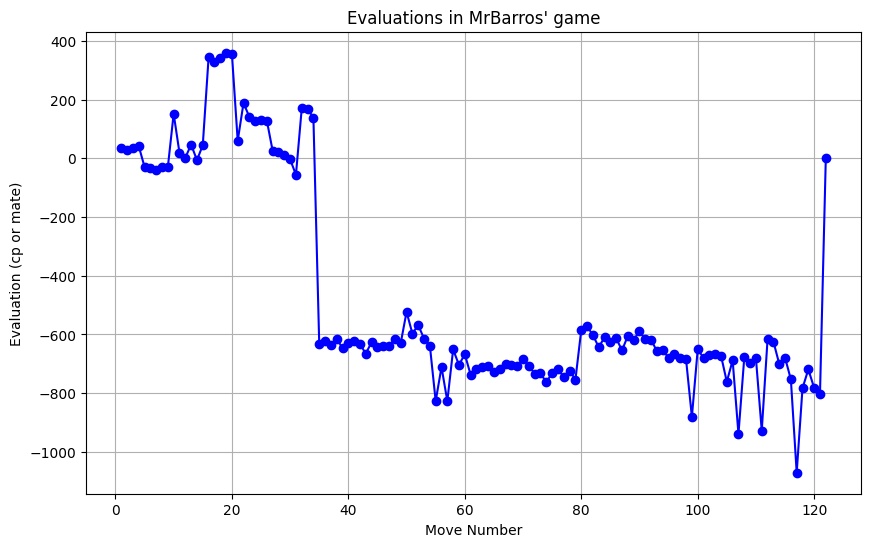

In [4]:
eval_values = []

for move_data in moves:
    if move_data.eval['type'] == 'cp':
        eval_values.append(move_data.eval['value'])
    else:
        eval_values.append(1000 * (1 + 1 / (move_data.eval['value'] + 1)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(moves) + 1), eval_values, marker='o', linestyle='-', color='blue')
plt.title('Evaluations in MrBarros\' game')
plt.xlabel('Move Number')
plt.ylabel('Evaluation (cp or mate)')
plt.grid(True)
plt.show()

In [5]:
def map_eval(eval):
    if eval['type'] == 'mate':
        if eval['value'] > 0:
            return 4
        elif eval['value'] < 0:
            return -4
        elif game.headers['Result'] == '1-0': # White Won
            return 4
        else:
            return -4
    else:
        value = eval['value']
        if value < -500:
            return -3
        elif -500 <= value < -300:
            return -2
        elif -300 <= value < -50:
            return -1
        elif -50 <= value < 50:
            return 0
        elif 50 <= value < 300:
            return 1
        elif 300 <= value < 500:
            return 2
        else:
            return 3

In [ ]:
features = {}

# Getting the 12th move or the last move
if len(moves) >= 24:
    eval = moves[23].eval
else:
    eval = moves[-1].eval

features['Opening Eval'] = map_eval(eval)

In [ ]:
# Getting the move where both player have 15 points or less, or the last move
for move_data in moves:
    if move_data.white_material <= 15 and move_data.black_material <= 15:
        eval = move_data.eval
        features['Midgame Eval'] = map_eval(eval)
        break

if 'Midgame Eval' not in features.keys():
    eval = moves[-1].eval
    features['Midgame Eval'] = map_eval(eval)

In [7]:
series = pd.Series(data=features)
series

Opening Eval    1
Midgame Eval   -3
dtype: int64